# Scenario 1

- Models score when the shuffle param in train_test_split is True.
- Predictions and error plot for stacking model (best score).
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model seletction results

This plot is about the models score generated with model_selection.py where the hyperparams are adjusted to optimize the results of each model.

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import std

# Dataset as a dataframe.
df = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case1/df_results.csv', sep=",")
df = df[['Name','MAE','std']]
df

,Name,MAE,std
0,nnet,0.511631,1.687367
1,lr,1.017306,1.289585
2,dtr,0.506086,1.635002
3,rf,0.473254,1.551588
4,svm,0.761486,1.359125
5,bayes,1.017543,1.283071
6,knn,0.475211,1.563858
7,gp,0.543137,1.574389
8,sgd,1.027247,1.302280
9,voting,0.469999,1.622246


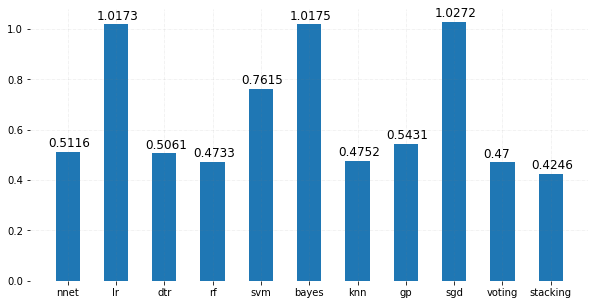

In [46]:
name = df['Name'].tolist()
score = df['MAE'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (stacking model)

The next plots shown the execution of final_test.py for each model, where it can be seen the predictions and the error generated.

In [47]:
# Dataset as a dataframe.
df_stacking = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case1/df_final_test_stacking.csv', sep=",")
df_stacking = df_stacking[['y_test','y_pred','reg_error']]
df_stacking

,y_test,y_pred,reg_error
0,0.7900,0.941714,-1.517143e-01
1,0.7900,0.790000,0.000000e+00
2,0.7900,0.816250,-2.625000e-02
3,0.7900,0.790000,0.000000e+00
4,0.7900,0.790000,-5.551115e-16
...,...,...,...
281,7.3000,7.631800,-3.318000e-01
282,8.2880,9.724750,-1.436750e+00
283,8.6850,9.724750,-1.039750e+00
284,10.3904,4.430143,5.960257e+00


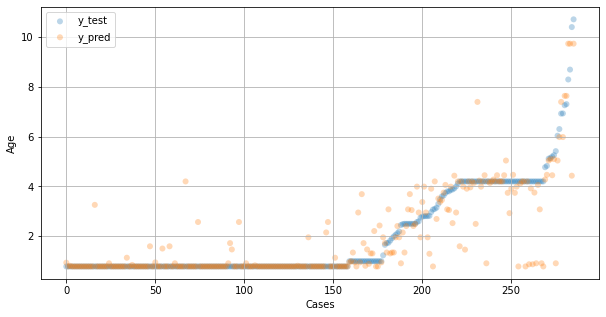

In [48]:
n = np.arange(df_stacking['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_stacking['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_stacking['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.set_xlabel('Cases')
ax.set_ylabel('Age')
ax.legend()
ax.grid(True)
plt.show()

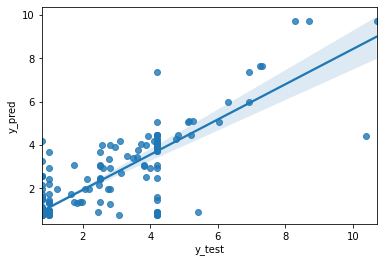

In [49]:
import seaborn as sns
sns.regplot(x="y_test", y="y_pred", data=df_stacking);

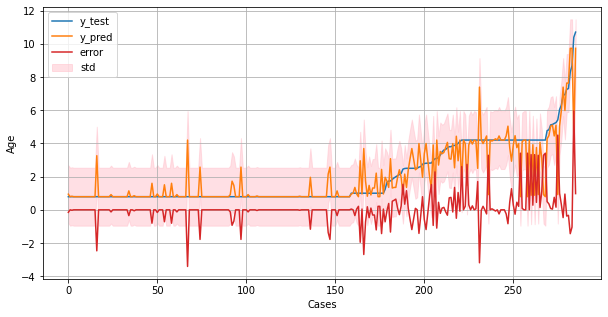

In [50]:
# Selecting score and standard deviation
score = df.iloc[10,1]
y_std = df.iloc[10,2]

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_stacking['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_stacking['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_stacking['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_stacking['y_pred']-y_std, df_stacking['y_pred']+y_std,
                color="pink", alpha=0.5, label="std")
ax.set_xlabel('Cases')
ax.set_ylabel('Age')
ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test)

In [51]:
# Train and test datasets as one dataframe.
df_data = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case1/df_data.csv', sep=",")
df_data = df_data[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


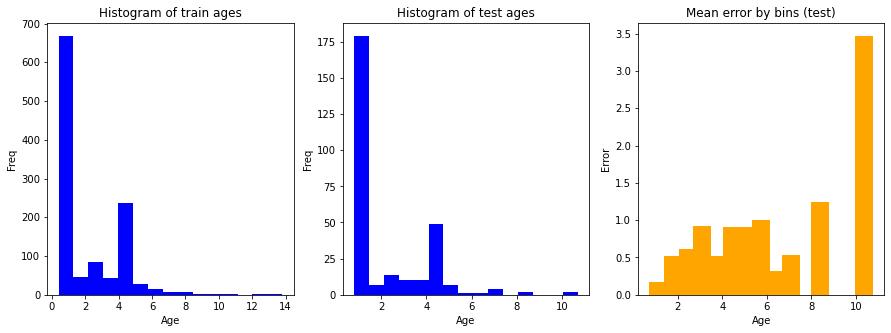

In [52]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data['y_test'], num_bins, density=False, color='blue')

# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_stacking[(df_stacking['y_test'] >= bins2[i])
                                    & (df_stacking['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_stacking[(df_stacking['y_test'] >= bins2[i])
                                    & (df_stacking['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error,color='orange')


ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')
plt.show()

In [53]:
# Next df shows the mean error for each bin

df_bins_error = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error

,Bin,Mean Error
0,1,0.171328
1,2,0.517346
2,3,0.615012
3,4,0.927841
4,5,0.519872
5,6,0.914798
6,7,0.911083
7,8,0.996683
8,9,0.321000
9,10,0.531157


# Scenario 2

- Models score when the shuffle param in train_test_split is False.
    - Train set: from 0.4 to 4.2 (80% of the entire dataset)
    - Test set: from 4.2 to 13.8 (20% of the entire dataset)
- Predictions and error plot for neural network model (best score).
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [54]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case2/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','MAE','std']]
df_nosh

,Name,MAE,std
0,nnet,1.388788,1.152602
1,lr,2.782399,1.565663
2,dtr,1.572493,1.151474
3,rf,1.630072,0.923842
4,svm,2.782321,2.076804
5,bayes,2.777276,1.293455
6,knn,1.677838,1.296015
7,gp,1.718486,1.295844
8,sgd,3.800769,0.776309
9,voting,1.664813,1.015407


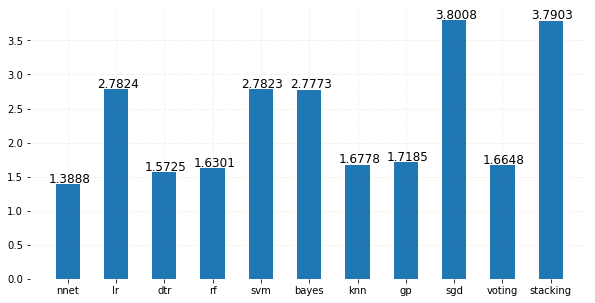

In [55]:
name = df_nosh['Name'].tolist()
score = df_nosh['MAE'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (neural network model)

In [56]:
# Dataset as a dataframe.
df_nnet_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case2/df_final_test_nnet.csv', sep=",")
df_nnet_nosh = df_nnet_nosh[['y_test','y_pred','reg_error']]
df_nnet_nosh

,y_test,y_pred,reg_error
0,4.20,2.934841,1.265159
1,4.20,3.631281,0.568719
2,4.20,2.074677,2.125323
3,4.20,3.905269,0.294731
4,4.20,4.369134,-0.169134
...,...,...,...
281,10.70,4.292264,6.407736
282,10.70,4.145168,6.554832
283,12.40,1.584766,10.815234
284,13.62,3.366837,10.253163


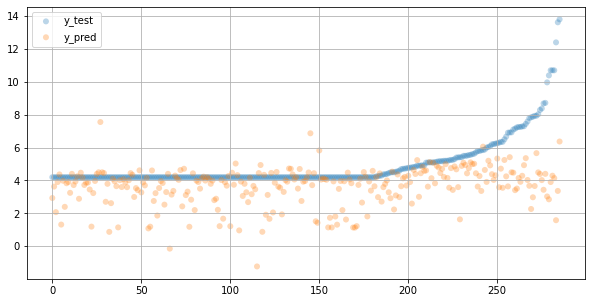

In [57]:
n = np.arange(df_nnet_nosh['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

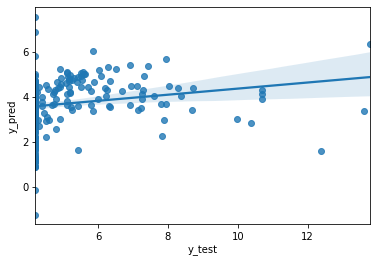

In [58]:
import seaborn as sns
sns.regplot(x="y_test", y="y_pred", data=df_nnet_nosh);

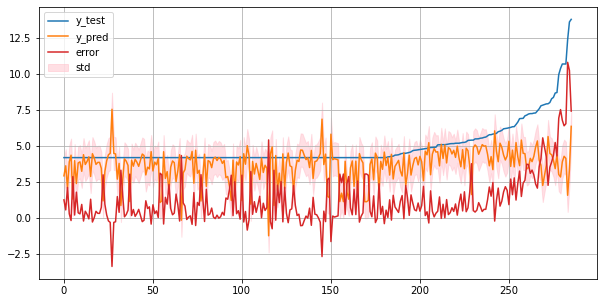

In [59]:
# Selecting score and std

score = df_nosh.iloc[0,1]
y_std_nosh = df_nosh.iloc[0,2]

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_nnet_nosh['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_nnet_nosh['y_pred']-y_std_nosh, df_nnet_nosh['y_pred']+y_std_nosh,
                color="pink", alpha=0.5, label="std")

ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [60]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case2/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


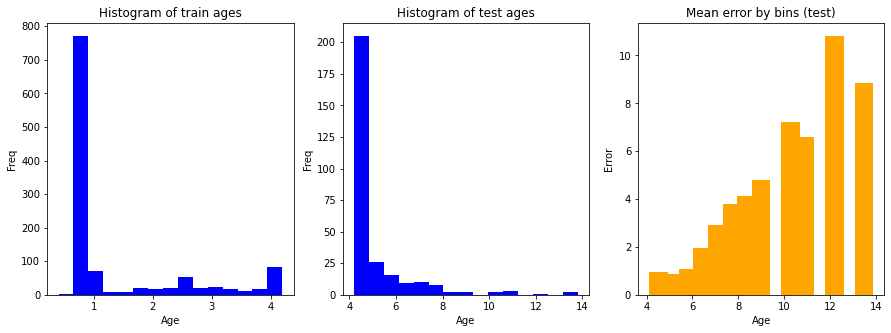

In [61]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error, color='orange')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')
plt.show()

In [62]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,0.972958
1,2,0.871388
2,3,1.092607
3,4,1.961999
4,5,2.909264
5,6,3.788564
6,7,4.123413
7,8,4.782307
8,9,NaN
9,10,7.236623


# Scenario 3

Last wihout-shuffle case has this age distribution (seen in the last histograms):
- Train set: from 0.4 to 4.2 (80% of the entire dataset)
- Test set: from 4.2 to 13.8 (20% of the entire dataset)

In this case, it's selected a diferent value range for each one:
- Train set: from 0.4 to 3.03 (70% of the entire dataset)
- Test set: from 3.04 to 13.8 (30% of the entire dataset)

This split allows to assign each one of two most populated ages in differents sets (age 0.79 in train set and age 4.2 in test set)

### Model Selection Results without shuffle

In [63]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case3/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','MAE','std']]
df_nosh

,Name,MAE,std
0,nnet,2.736638,1.592451
1,lr,3.174805,1.165616
2,dtr,2.750195,0.817857
3,rf,2.749800,0.763695
4,svm,3.616649,0.079018
5,bayes,3.172744,0.994555
6,knn,2.720618,0.881360
7,gp,2.960918,0.631673
8,sgd,3.588258,0.360046
9,voting,2.732833,0.757726


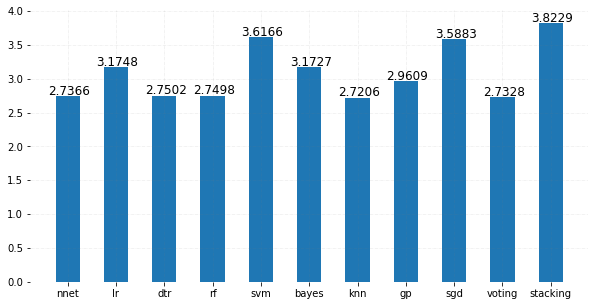

In [64]:
name = df_nosh['Name'].tolist()
score = df_nosh['MAE'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (knn model)

In [65]:
# Dataset as a dataframe.
df_nnet_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case3/df_final_test_knn.csv', sep=",")
df_nnet_nosh = df_nnet_nosh[['y_test','y_pred','reg_error']]
df_nnet_nosh

,y_test,y_pred,reg_error
0,3.041,2.947,0.094
1,3.052,1.977,1.075
2,3.054,1.726,1.328
3,3.072,0.790,2.282
4,3.084,2.795,0.289
...,...,...,...
424,10.700,2.500,8.200
425,10.700,2.500,8.200
426,12.400,1.000,11.400
427,13.620,2.500,11.120


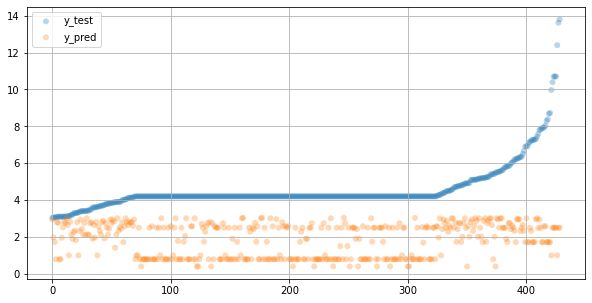

In [66]:
n = np.arange(df_nnet_nosh['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

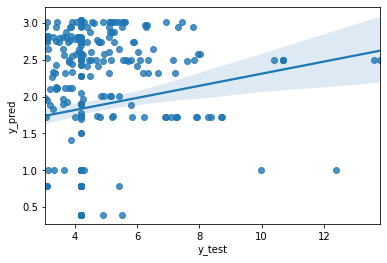

In [67]:
import seaborn as sns
sns.regplot(x="y_test", y="y_pred", data=df_nnet_nosh);

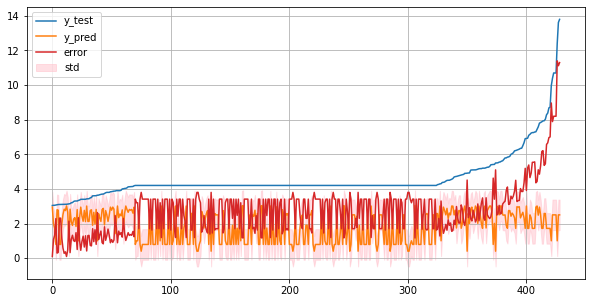

In [68]:
# Selecting score and std

score = df_nosh.iloc[6,1]
y_std_nosh = df_nosh.iloc[6,2]

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_nnet_nosh['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_nnet_nosh['y_pred']-y_std_nosh, df_nnet_nosh['y_pred']+y_std_nosh,
                color="pink", alpha=0.5, label="std")

ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [69]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case3/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


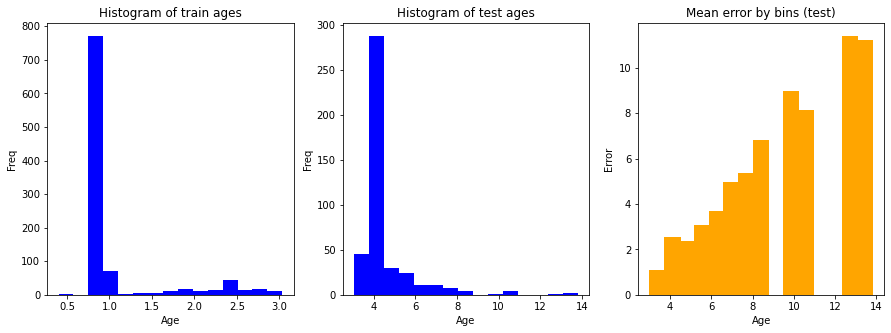

In [70]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error, color='orange')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')
plt.show()

In [71]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,1.098376
1,2,2.539873
2,3,2.386077
3,4,3.085867
4,5,3.692909
5,6,4.961927
6,7,5.363625
7,8,6.800500
8,9,NaN
9,10,8.967000


# Scenario 4

- **Same configuration of scenario 2 but switching the train and test datasets**

    - Scenario 2 has this age distribution (seen in the last histograms):
        - Train set: from 0.4 to 4.2 (80% of the entire dataset)
        - Test set: from 4.2 to 13.8 (20% of the entire dataset)

    - In this case:
        - Train set: from 3.04 to 13.8 (20% of the entire dataset)
        - Test set: from 0.4 to 3.03 (80% of the entire dataset)


- Models score when the shuffle param in train_test_split is False.
- Predictions and error plot for neural network model (best score).
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [72]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case4/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','MAE','std']]
df_nosh

,Name,MAE,std
0,nnet,2.717493,0.821879
1,lr,3.253916,0.808172
2,dtr,2.806046,0.000000
3,rf,2.932654,0.296993
4,svm,2.908053,0.018829
5,bayes,3.247391,0.775706
6,knn,2.995415,0.432704
7,gp,3.136194,0.539080
8,sgd,3.060446,0.477778
9,voting,3.161684,0.518123


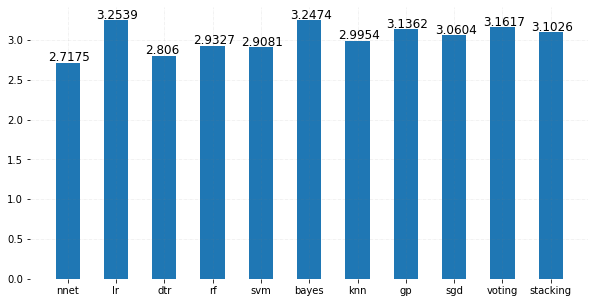

In [73]:
name = df_nosh['Name'].tolist()
score = df_nosh['MAE'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (neural network model)

In [74]:
# Dataset as a dataframe.
df_nnet_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case4/df_final_test_nnet.csv', sep=",")
df_nnet_nosh = df_nnet_nosh[['y_test','y_pred','reg_error']]
df_nnet_nosh

,y_test,y_pred,reg_error
0,0.400,4.529885,-4.129885
1,0.484,4.420637,-3.936637
2,0.790,4.268576,-3.478576
3,0.790,4.298864,-3.508864
4,0.790,3.698024,-2.908024
...,...,...,...
1138,4.200,4.201161,-0.001161
1139,4.200,4.525911,-0.325911
1140,4.200,4.191432,0.008568
1141,4.200,4.228872,-0.028872


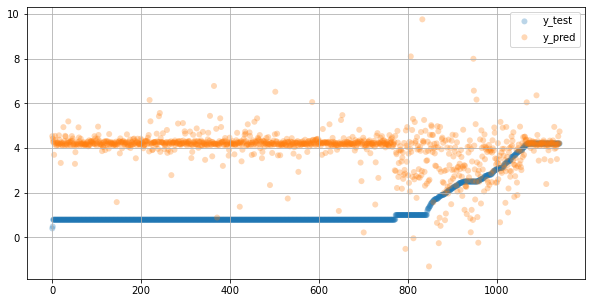

In [75]:
n = np.arange(df_nnet_nosh['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

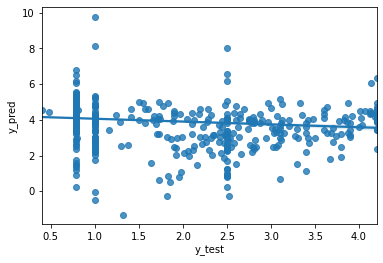

In [76]:
import seaborn as sns
sns.regplot(x="y_test", y="y_pred", data=df_nnet_nosh);

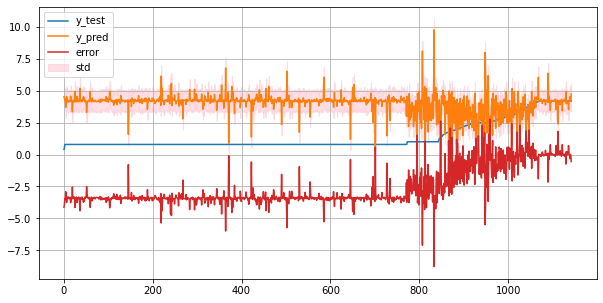

In [77]:
# Selecting score and std

score = df_nosh.iloc[0,1]
y_std_nosh = df_nosh.iloc[0,2]

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_nnet_nosh['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_nnet_nosh['y_pred']-y_std_nosh, df_nnet_nosh['y_pred']+y_std_nosh,
                color="pink", alpha=0.5, label="std")

ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [78]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case4/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


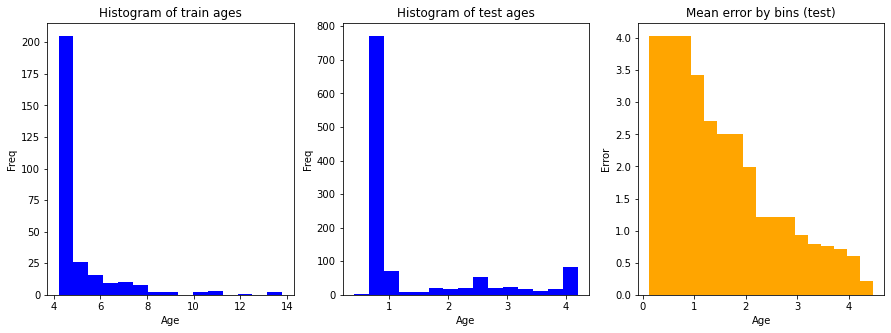

In [79]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error, color='orange')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')
plt.show()

In [80]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,4.033261
1,2,3.417846
2,3,2.706307
3,4,2.373740
4,5,2.507679
5,6,1.989377
6,7,0.983083
7,8,1.087624
8,9,1.218287
9,10,0.932305


# Scenario 5

- **Same configuration of scenario 4 but adding samples to train set**

    - Scenario 4 has this age distribution:
        - Train set: from 3.04 to 13.8 (20% of the entire dataset)
        - Test set: from 0.4 to 3.03 (80% of the entire dataset)        

    - In this case:
        - Train set: from 1,6 to 13.8 (40% of the entire dataset)
        - Test set: from 0.4 to 1.57 (60% of the entire dataset)


- Models score when the shuffle param in train_test_split is False.
- Predictions and error plot for neural network model (best score).
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [92]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case5/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','MAE','std']]
df_nosh

,Name,MAE,std
0,nnet,3.272055,0.961521
1,lr,3.272484,0.648818
2,dtr,3.341598,0.270097
3,rf,3.202527,0.507571
4,svm,3.304640,0.048987
5,bayes,3.273281,0.636557
6,knn,3.075615,0.796013
7,gp,3.382002,0.855322
8,sgd,2.953491,0.429115
9,voting,3.244207,0.669151


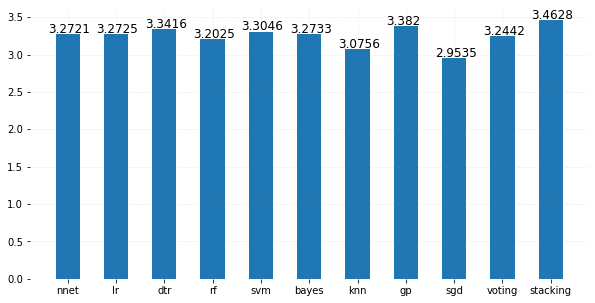

In [93]:
name = df_nosh['Name'].tolist()
score = df_nosh['MAE'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (SGD model)

In [94]:
# Dataset as a dataframe.
df_sgd_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case5/df_final_test_sgd.csv', sep=",")
df_sgd_nosh = df_sgd_nosh[['y_test','y_pred','reg_error']]
df_sgd_nosh

,y_test,y_pred,reg_error
0,0.400,3.788126,-3.388126
1,0.484,2.645022,-2.161022
2,0.790,3.715592,-2.925592
3,0.790,3.272743,-2.482743
4,0.790,3.788906,-2.998906
...,...,...,...
852,1.500,2.898695,-1.398695
853,1.500,3.396811,-1.896811
854,1.552,5.644754,-4.092754
855,1.566,3.138845,-1.572845


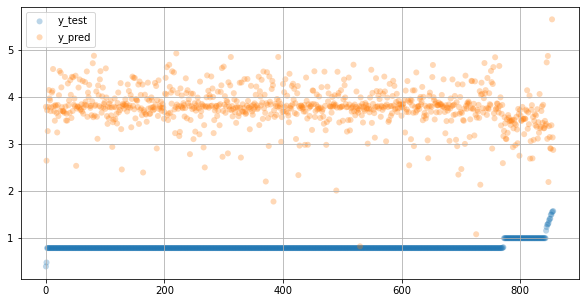

In [95]:
n = np.arange(df_sgd_nosh['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_sgd_nosh['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_sgd_nosh['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

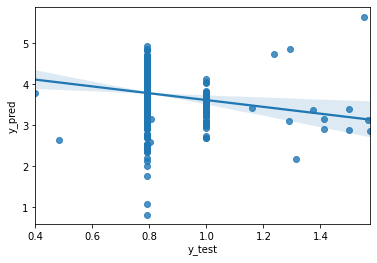

In [96]:
import seaborn as sns
sns.regplot(x="y_test", y="y_pred", data=df_sgd_nosh);

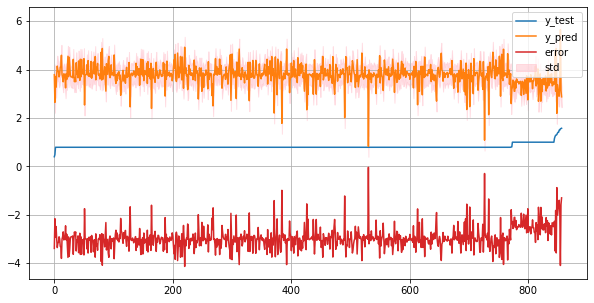

In [101]:
# Selecting score and std

score = df_nosh.iloc[8,1]
y_std_nosh = df_nosh.iloc[8,2]

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_sgd_nosh['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_sgd_nosh['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_sgd_nosh['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_sgd_nosh['y_pred']-y_std_nosh, df_sgd_nosh['y_pred']+y_std_nosh,
                color="pink", alpha=0.5, label="std")

ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [102]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_17_2_21_case5/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


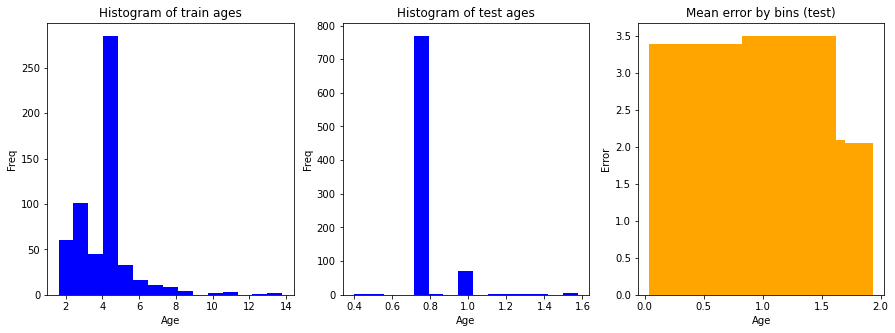

In [105]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_sgd_nosh[(df_sgd_nosh['y_test'] >= bins2[i])
                                    & (df_sgd_nosh['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_sgd_nosh[(df_sgd_nosh['y_test'] >= bins2[i])
                                    & (df_sgd_nosh['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error, color='orange')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')
plt.show()

In [106]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,3.388126
1,2,2.161022
2,3,NaN
3,4,NaN
4,5,3.016625
5,6,2.075460
6,7,NaN
7,8,2.452540
8,9,NaN
9,10,2.265555
